# Принятие решений в бизнесе

**Задача проводимого исследования - приоритизация гипотез для увеличения выручки крупного интернет-магазина, запуск A/B-теста и и анализ результатов.**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()

## 1 Часть. Приоритизация гипотез.

**Описание данных:**    
    
Файл /datasets/hypothesis.csv    
    
Hypothesis — краткое описание гипотезы;    
Reach — охват пользователей по 10-балльной шкале;    
Impact — влияние на пользователей по 10-балльной шкале;    
Confidence — уверенность в гипотезе по 10-балльной шкале;    
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Обработаем данные

In [2]:
# откроем файл
df = pd.read_csv(r'C:\Users\Юлия\Desktop\projects\hypothesis.csv')
df.head(2)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10


In [3]:
# переименуем названия колонок
df.columns= df.columns.str.lower()
df.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [4]:
# посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# посмотрим дубликаты
df.duplicated().sum()

0

### Применим фреймворк ICE для приоритизации гипотез

In [6]:
pd.options.display.max_colwidth = 100
df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
pd.options.display.max_colwidth = 100
# применим фреймворк ICE
df['ICE'] = round(df['impact'] * df['confidence'] / df['efforts'],2)

# отсортируем их по убыванию приоритета
df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Исходя из анализа мы можем видеть первую пятерку самых перспективных гипотез

### Применим фреймворк RICE для приоритизации гипотез

In [8]:
pd.options.display.max_colwidth = 100
# применим фреймворк RICE
df['RICE'] = df['reach'] * df['impact'] * df['confidence'] / df['efforts']

# отсортируем их по убыванию приоритета
df[['hypothesis', 'reach', 'impact', 'confidence', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,3.0


Пять перспективных гипотез остались неизменными, но они изменили свои позиции в рейтинге. Лидирует уже другая гипотеза о добавлении формы подписки на все основные страницы, тк ее парметр reach самый высокий, это говорит о том, что изменение затронет всех пользователей.

Параметр reach, отражающий охват пользователей, повлиял на порядок приоритизации гипотез. Это мы можем наблюдать сравнивая результаты 2х исследований.   
Ввиду высоких показателей охвата поднялись в рейтинге гипотезы о добавлении формы подписки и добавлении блока рекомендаций, их показатель reach самый высокий.    
Гипотезы о запуске акции, дающей скидку на товар в день и добавлении двух новых каналов привлечения трафика упали в рейтинге из-за низкого показателя охвата, но гипотеза о добавлении двух новых каналов снизилась не сильно, тк показатель влияния на пользователей максимальный.   
Гипотеза о показе на главной странице баннеров осталась на своем 4м месте

## 2 Часть. Анализ A/B-теста

**Описание данных:**    
    
Файл /datasets/orders.csv.     

transactionId — идентификатор заказа;    
visitorId — идентификатор пользователя, совершившего заказ;    
date — дата, когда был совершён заказ;    
revenue — выручка заказа;    
group — группа A/B-теста, в которую попал заказ.    
    
Файл /datasets/visitors.csv.    
    
date — дата;    
group — группа A/B-теста;    
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.    

### Обработаем данные

In [9]:
# откроем файлы
orders = pd.read_csv(r'C:\Users\Юлия\Desktop\projects\orders.csv')
display(orders.head(2))

visitors = pd.read_csv(r'C:\Users\Юлия\Desktop\projects\visitors.csv')
display(visitors.head(2))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [10]:
# посмотрим общую информацию
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [11]:
# изменим тип данных в столбце с датой таблицы orders
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.date.dtype

dtype('<M8[ns]')

In [12]:
# изменим тип данных в столбце с датой таблицы visitors
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.date.dtype

dtype('<M8[ns]')

In [13]:
# посмотрим дубликаты
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

In [14]:
# посмотрим пропуски
display(orders.isna().sum())
display(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [15]:
# проверим не попали ли пользователи в несколько групп сразу
user_AB = orders.groupby('visitorId', as_index=False)['group'].nunique()
user_AB = user_AB.loc[user_AB['group'] > 1]
user_AB_list = user_AB.visitorId.unique()

In [16]:
buy = user_AB.merge(orders, on='visitorId', how='left', suffixes=['_count', '_name'])

# проверим, сколько процентов выручки заказа составляют пользователи обеих групп от общей сумму выручки
display('% выручки:' ,round((buy.revenue.sum()/orders.revenue.sum()*100),1))

# проверим, сколько процентов пользователи обеих групп составляют от общего чиса пользователей
display('% пользователей:' ,round((buy.visitorId.nunique()/orders.visitorId.nunique()*100),1))

# посмотрим какая сумма выручки относится к какой группе среди этих пользователей
buy.groupby('group_name')['revenue'].sum()

'% выручки:'

15.6

'% пользователей:'

5.6

group_name
A    720147
B    838788
Name: revenue, dtype: int64

Даже не смотря на то, что процент от общей выучки ошибочно попавших в обе группы пользователей составляет 15%, общая разница распределенеия сумм выручки в разрезе групп не сильно велика. И, принимая во внимание, что это только 6% пользователей от общего числа, исключим некоректно попавших пользователей в обе группы теста из исследования.

In [17]:
# сохраним старые данные 
orders_before = orders.copy()
# удалим пользователей из данных, которые оказались в 2х группах сразу
orders = orders.query('visitorId not in @user_AB_list')
display(orders_before.info())
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


### Построим график кумулятивной выручки по группам

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [19]:
# соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [20]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [21]:
# oбъединим обе таблицы в одну
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


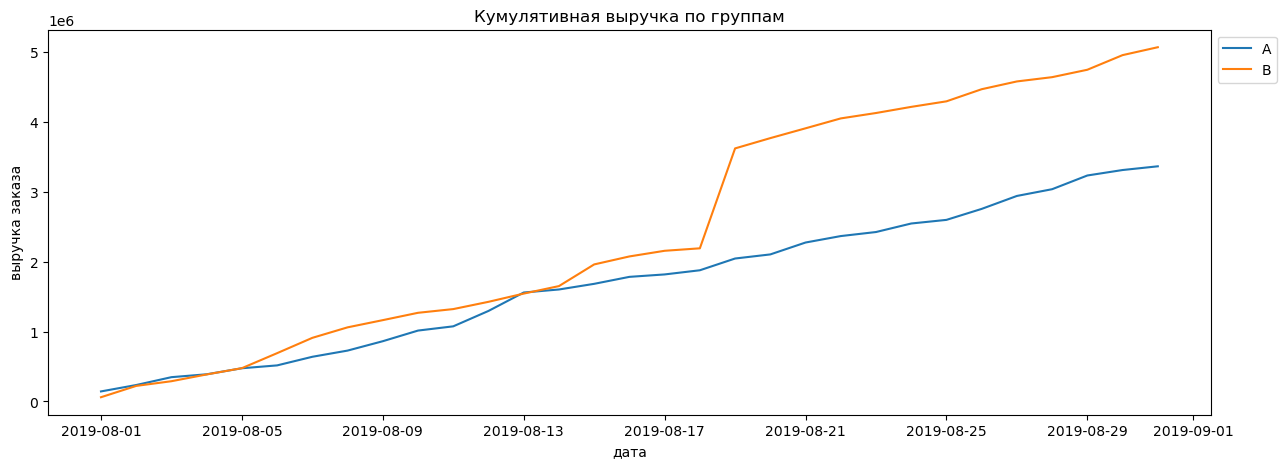

In [22]:
# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# построим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(15, 5)
plt.title('Кумулятивная выручка по группам') 
plt.xlabel('дата')
plt.ylabel('выручка заказа')

plt.show()

В середине проводимого теста группа В вырвалась вперед и закрепила лидерство до конца теста. Скорее всего это свидетельствует о влиянии аномально больших заказов на результаты теста. При завершающем анализе следует их удалить.

### Построим график кумулятивного среднего чека по группам

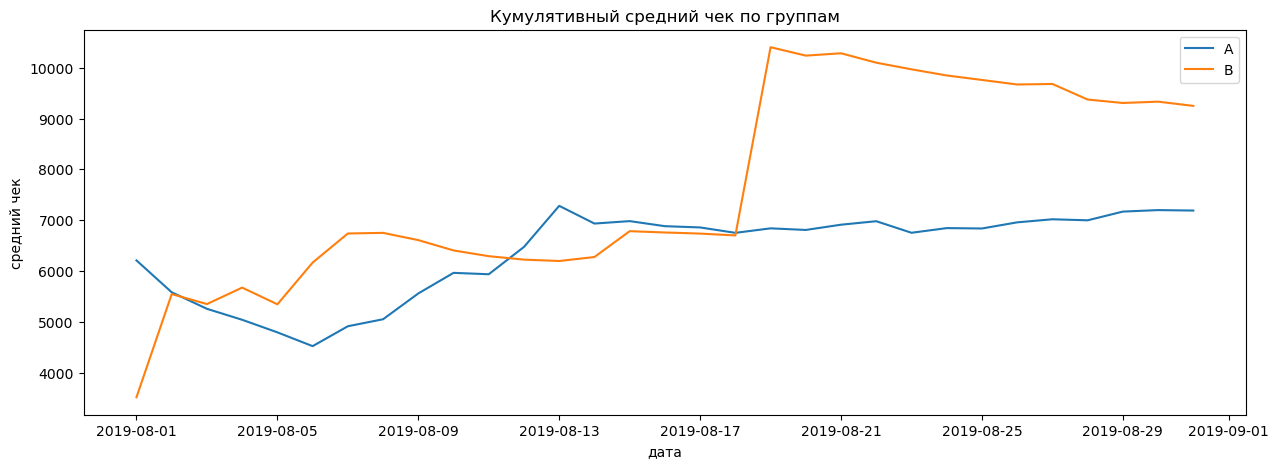

In [23]:
# разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend(bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(15, 5)
plt.title('Кумулятивный средний чек по группам') 
plt.xlabel('дата')
plt.ylabel('средний чек')

plt.show()

Средний чек в группе B значительно превышает средний чек в группе А к концу теста. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных или дополнительный анализ выбросов, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

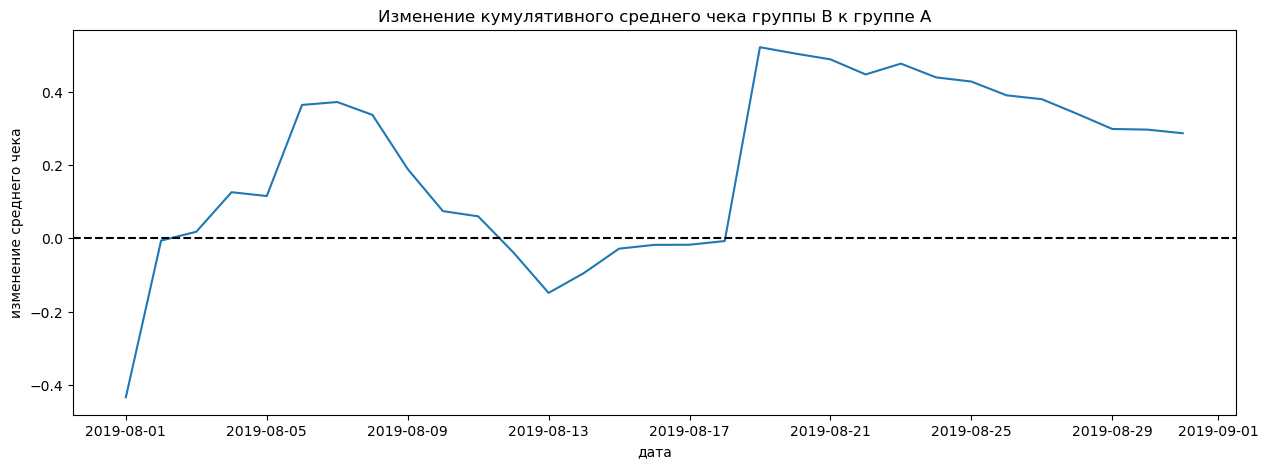

In [24]:
# собирем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) \
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавим ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.gcf().set_size_inches(15, 5)
plt.title('Изменение кумулятивного среднего чека группы B к группе A') 
plt.xlabel('дата')
plt.ylabel('изменение среднего чека')

plt.show()

Изменение среднего чека группы B к группе A сильно менялись в некоторые периоды теста. Возможно, тогда были совершены аномальные заказы, следует их найти.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

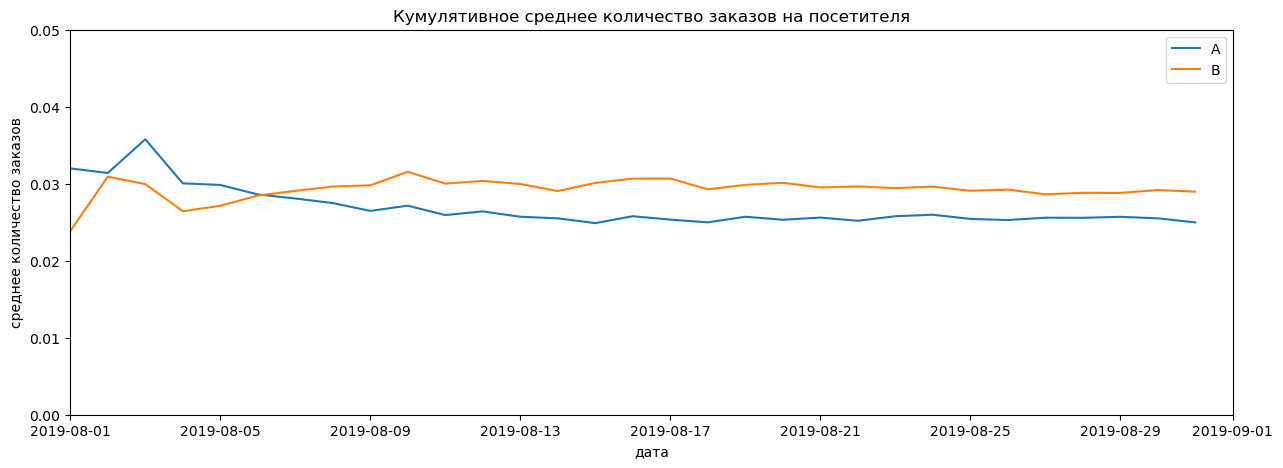

In [25]:
# посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# построим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# зададим масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])

plt.gcf().set_size_inches(15, 5)
plt.title('Кумулятивное среднее количество заказов на посетителя') 
plt.xlabel('дата')
plt.ylabel('среднее количество заказов')

plt.show()

Масштаб графика изменен, чтобы наглядно посмотреть, что абсолютное значение колебания в начале и в конце теста не слишком большое:от 2% до 4%.
Группы колебались около одного значения, но затем конверсия группы В стала расти и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

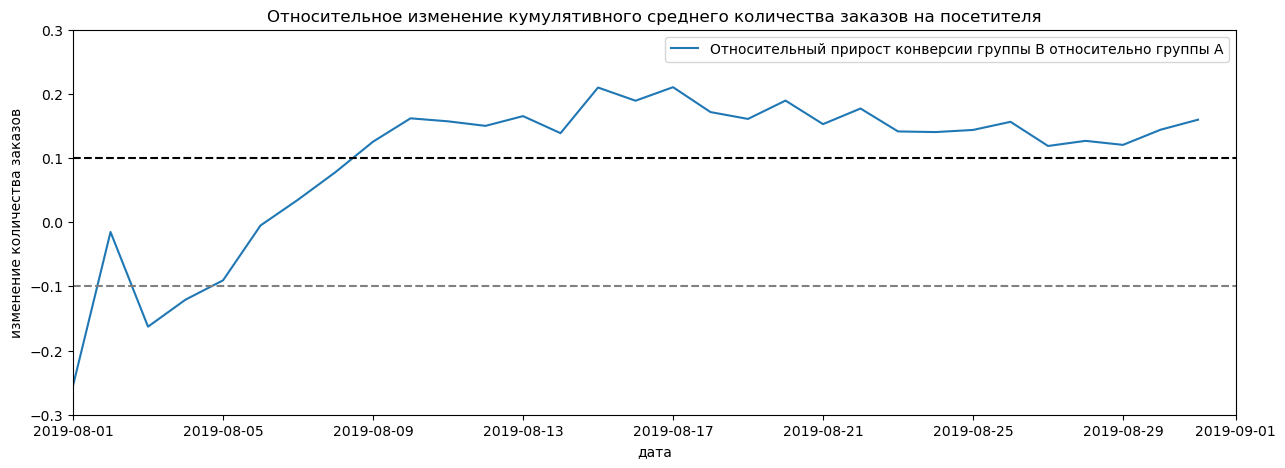

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions\
         ['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3])
plt.gcf().set_size_inches(15, 5)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя') 
plt.xlabel('дата')
plt.ylabel('изменение количества заказов')

plt.show()

В начале теста группа B значительно лидировала относительно группы A и её конверсия зафиксировалась в районе 10% прироста относительно группы А.

### Проанализируем количество заказов по пользователям

In [27]:
# найдем число заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique',}) \
    .sort_values(by='transactionId',ascending=False)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


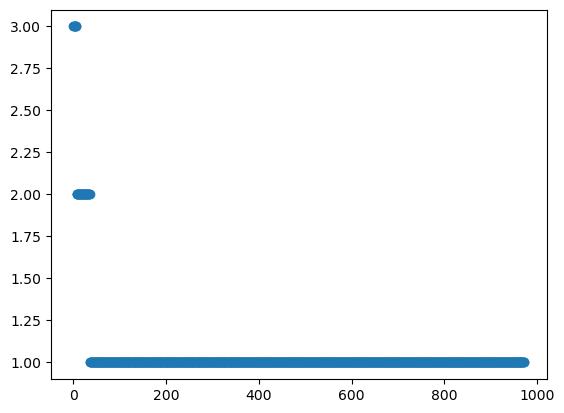

In [28]:
# построим точечный график количества заказов по пользователям
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.show()

На графике видно, что очень мало пользователей совершили больше 1 заказа, максимум совершенных заказов 3. Возможно, такие пользователи могут быть аномальными.

In [29]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя
percentile_orders = np.percentile(ordersByUsers['orders'], [95, 99])
display(percentile_orders)

# выберем нижнюю границу для определения аномальний
percentile_orders = percentile_orders[0]
percentile_orders

array([1., 2.])

1.0

Не более 5% пользователей совершали больше 1 заказа и не более 1% пользователей совершали больше 2 заказов.    
Всего 95% пользователей сделали 1 заказ, остальных пользователей можно считать аномальными.

### Проанализируем стоимость заказов

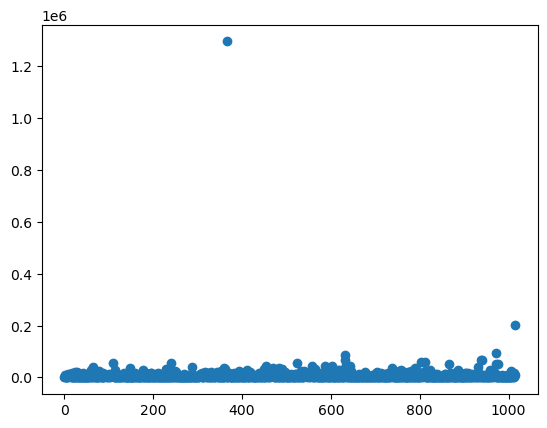

In [30]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.show()

Есть 2 выброса в районе 200 тыс и 1.2 млн, их можно считать аномалиями.

In [31]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
display(percentile_revenue)

# выберем нижнюю границу для определения аномальний
percentile_revenue = percentile_revenue[0]
percentile_revenue

array([26785., 53904.])

26785.0

Не более 5% заказов на сумму больше 26785 и не более 1% заказов а сумму больше 53904.
Заказы больше 26785 можно считать аномальными.

### Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы:    

Нулевая: различий в среднем количестве заказов между группами нет.    
Альтернативная: различия в среднем между группами есть.

In [36]:
# подготовка данных

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

**Описание данных:**    

date — дата;    
ordersPerDateA — количество заказов в выбранную дату в группе A;    
revenuePerDateA — суммарная выручка в выбранную дату в группе A;    
ordersPerDateB — количество заказов в выбранную дату в группе B;    
revenuePerDateB — суммарная выручка в выбранную дату в группе B;    
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;    
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;    
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;    
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;    
visitorsPerDateA — количество пользователей в выбранную дату в группе A;    
visitorsPerDateB — количество пользователей в выбранную дату в группе B;    
visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;    
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [37]:
# посчитаем статистическую значимость различия в среднем количестве заказов между группами
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01102
0.160


P-value 0.01102 меньше 0.05, значит 0 гипотезу, что различий в среднем количестве заказов между группами нет, отвергаем.    
Анализ "сырых данных" говорит, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А сотавил 16%.

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:    

Нулевая: различий в среднем чеке заказа между группами нет.    
Альтернативная: различия в среднем между группами есть.

In [38]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.829'

'0.287'

P-value больше 0.05, значит 0 гипотезу, что различий в среднем чеке заказа между группами нет, не отвергаем.    
Относительный прирост среднего группы В к конверсии группы А сотавил 28,7%.
Стоить провести исследование, исключив аномалии, возможно выбросы сильно искажают картину, что влияет на различие в среднем чеке.

### Обработка аномалий

In [39]:
# создадим  список аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA.query('orders > @percentile_orders')['userId'],
        ordersByUsersB.query('orders > @percentile_orders')['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders.query('revenue > @percentile_revenue')['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64


### Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем гипотезы:    

Нулевая: различий в среднем количестве заказов между группами нет.    
Альтернативная: различия в среднем между группами есть.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01593
0.174


Итог исследования практически не отличается от изначального исследования по «сырым» данным.    
P-value 0.01593 меньше 0.05, значит 0 гипотезу, что различий в среднем количестве заказов между группами нет, отвергаем.
Относительный прирост среднего группы В к конверсии группы А чуть выше «сырых» данных и сотавил 17,4%.    
Сегмент В значительно лучше сегмента А.

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы:    

Нулевая: различий в среднем чеке заказа между группами нет.    
Альтернативная: различия в среднем между группами есть.

In [41]:
display(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'0.727'

'-0.034'

Итог исследования отличается от изначального исследования по «сырым» данным.    
P-value также больше 0.05, 0 гипотезу, что различий в среднем чеке заказа между группами нет, не отвергаем.
Относительный прирост среднего группы В к конверсии группы А отрицательный и сотавил - 3,4% (в «сырых» данных прирост был положительный и составил 28,7%).

## Вывод

**Следует остановить тест и зафиксировать победу группы В.**

Аргументы и рекомендации:    

1. Сегмент В лучше сегмента А по среднему количеству заказов на 16% до фильтрации аномалий и 17,4% после. Гипотеза, что различий в среднем количестве заказов между группами нет, отвергнута;
2. График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A. Конверсия группы В зафиксировалась в районе 10% прироста относительно группы А с середины и до конца теста;
3. До фильтрации аномалий относительный прирост среднего группы В к конверсии группы А был 28,7%. А после фильтрации аномалий стал отрицательный и составил 3,4%. Гипотеза, что различий в среднем чеке заказа между группами нет, не отвергнута. Следовательно, стоит уделить этому особое внимание и сделать упор на увеличение среднего чека пользователя.